### Explore Bike Share Data

In [2]:
# Importing packages
library(dplyr)
library(ggthemes)
library(ggplot2)

In [2]:
# Convert csv to dataframe for each city
ny = read.csv('new-york-city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [4]:
# Display basic info in frame
head(ny)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
2,4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
3,2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
4,3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
5,6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
6,1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [5]:
# Display basic info in frame
head(wash)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
2,482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
3,1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
4,665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
5,1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
6,1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [6]:
# Display basic info in frame
head(chi)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
1,1423854,6/23/2017 15:09,6/23/2017 15:14,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
2,955915,5/25/2017 18:19,5/25/2017 18:45,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
3,9031,1/4/2017 8:27,1/4/2017 8:34,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
4,304487,3/6/2017 13:49,3/6/2017 13:55,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
5,45207,1/17/2017 14:53,1/17/2017 15:02,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
6,1473887,6/26/2017 9:01,6/26/2017 9:11,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Data Wrangling/Cleaning

I want to combine the data frames into a master frame for easier exploration/analysis. Before I can combine the frames, I need to make sure that all of the frames have the same columns available. I also need to add a column to each frame to designate the city before combining.  

In [3]:
# Adding Gender and Birth.Year columns to Wash
## Adding so I can combine the dataframes smoothly
### Ref: https://www.statology.org/r-add-a-column-to-dataframe/
wash$Gender <- NA
wash$Birth.Year <- NA

head(wash,1)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<lgl>
1,1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber,NA,NA


In [4]:
# Adding City column to each frame so value can be retained when frames are combined
ny$City <- 'New York City'
wash$City <- 'Washington'
chi$City <- 'Chicago'

head(wash,1)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>
1,1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber,NA,NA,Washington


In [5]:
# Using dplyr bind_rows function to combine the three frames into df
## Ref: https://dplyr.tidyverse.org/reference/bind.html
df = bind_rows(ny,wash,chi)

head(df)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York City
2,4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York City
3,2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York City
4,3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York City
5,6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York City
6,1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York City


In [6]:
# Looking at the unique city values to confirm the three frames combined
unique(df$City)

[1] "New York City" "Washington"    "Chicago"

### Question 1
#### What is the average duration of travel for users in different citites?
The first area I want to explore is the average trip duration for users in different cities. My initial thoughts are that NYC will likely have the lowest trip average. I believe people in NYC may travel less distance than people in other cities, due to the availability of resources close to ones home. For similar reasons, I think Washington may have higher average durations. Washington is more spread out, with less density than NYC. I believe people have to travel farther here to access resources 

In [11]:
# Listing a count of users in each city
count(df, City)

City,n
<chr>,<int>
Chicago,300000
New York City,300000
Washington,300000


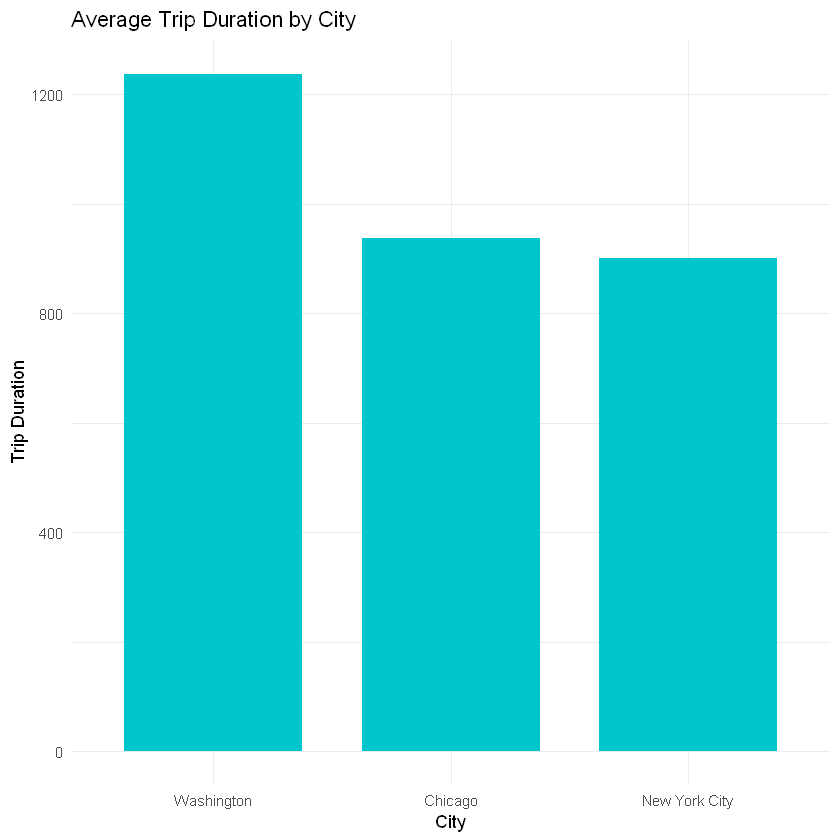

In [12]:
# Creating bar plot to show the average trip duration by city
## Ref https://stackoverflow.com/questions/61669169/no-summary-function-supplied-defaulting-to-mean-se
### Ref http://www.sthda.com/english/wiki/ggplot2-barplots-quick-start-guide-r-software-and-data-visualization
#### Ref https://www.rpubs.com/dvdunne/reorder_ggplot_barchart_axis
ggplot(aes(x = reorder(City, -Trip.Duration), y = Trip.Duration), data = df) + 
    geom_bar(stat = 'summary', fun = mean, width = .75, fill = 'turquoise3')+ 
    ggtitle("Average Trip Duration by City")+
    labs(x = "City", y = "Trip Duration")+
    theme_minimal()

In [26]:
# Viewing summary statistics of average trip duration by city
## Ref https://dplyr.tidyverse.org/reference/summarise.html
metrics <- group_by(df, City)
summarize(metrics, Avg_Duration = mean(Trip.Duration))

City,Avg_Duration
<chr>,<dbl>
Chicago,936.2393
New York City,899.6842
Washington,1237.2800


**Summary of your question 1 results goes here.**

- Descending travel time by city: Washington, Chicago, New York City <br>
     - Washington: 1237.28
     - Chicago: 936.2393
     - New York City: 899.6842 <br> 

The number of users in each city is 300,000, so this should be a pretty accurate spread of data to review. This lines up with my initial estimate. While I do not know whether or not this is due to resource availability, the data supports the hypothesis.

### Question 2

#### What users are taking the longest rides?
The next question I'm interested in exploring is if there are specific user types that take longer rides than others. Obviously the resulting statistics will be influenced by the number of users in each group, as the more data points there are, the more variance in the threshhold is possible. But it may still be useful to see if there is a clear relationship between user type and trip duration. 

In [9]:
# Looking at the unique user types
unique(df$User.Type)

[1] "Subscriber" "Customer"   ""           "Dependent"

In [9]:
# Replacing empty values with NA
df$User.Type[df$User.Type == ""] <- NA

In [11]:
# Viewing the counts of each user type
count(df, User.Type)

User.Type,n
<chr>,<int>
Customer,170483
Dependent,1
Subscriber,728824
NA,692


Since there are so few 'Dependent' and null users, I'm going to omit them for a cleaner visualization. 

In [7]:
# Creating a new data frame without the unecessary user types
user_filtered <- filter(df, User.Type == 'Subscriber' | User.Type == 'Customer')

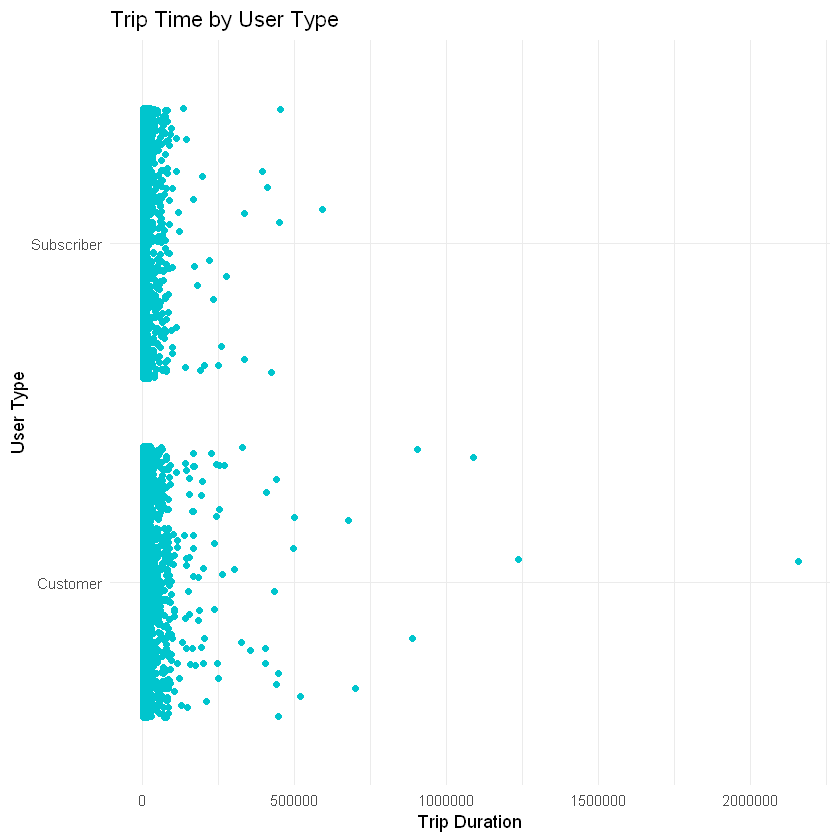

In [18]:
# Creating jitter plot to look at which users have the highest trip averages
## Ref https://rkabacoff.github.io/datavis/Bivariate.html#strip-plots
ggplot(aes(x = reorder(User.Type, -Trip.Duration), y = Trip.Duration), data = user_filtered)+
    geom_jitter(color = 'turquoise3')+
    ggtitle("Trip Time by User Type")+
    labs(x = 'User Type', y = 'Trip Duration')+
    theme_minimal()+
    coord_flip()

**Summary of your question 2 results goes here.** <br>
Counts of user by type:
- Subscriber: 728,824
- Customer: 170,483
- NA: 692
- Dependant: 1

After reviewing the visualization and counts of ride duration by user type; there does not appear to be a definite correlation between the two. Omitting one outlier in the 'Customer' category, the distribution looks about even between both 'Customer' and 'Subscriber'. There are a couple instances of longer rides in 'Customer', but I don't think it is enough to be statistically significant. 

### Question 3

#### What is the proportion of user types by city?
The last question I'm interested in exploring is what the proportion of subscribers vs customers is in each city. Since there are so few instances of null records in user type, it should be a pretty accurate spread. Seeing if there is a city where users are more likely to be subscribers or one-off customers may be useful 

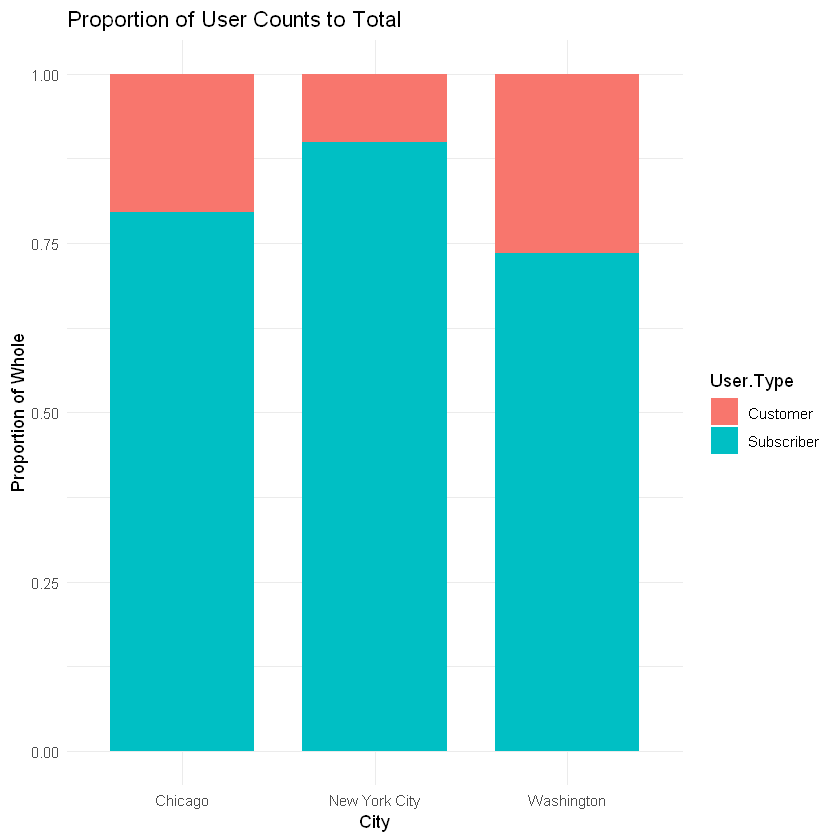

In [19]:
# Creating a percent stacked bar chart to view proportion of user type to the whole count
## Ref https://r-graph-gallery.com/48-grouped-barplot-with-ggplot2.html
ggplot(aes(fill = User.Type, x = City, Y = User.Type), data = user_filtered)+
    geom_bar(position = 'fill', width = .75)+ 
    ggtitle('Proportion of User Counts to Total')+
    labs(x = 'City', y = 'Proportion of Whole')+
    theme_minimal()


In [47]:
# Creating a function to calculate proportion of variable type by the city's total users
## x == City name (ie: New York City, Chicago, Washington)
## y == User.Type (ie: Subscriber, Customer)
### Ref https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/noquote
type_prop = function(x,y){
        subscriber = count(filter(user_filtered, (User.Type == y & City == x)))
        total = count(filter(user_filtered, City == x))
        sub_prop = round(subscriber / total * 100)
        print(noquote(paste('The percentage of users in',x,'that are', y, 'is', sub_prop,'%')))
        print(noquote(paste('Compared to the total of',total,'users')))
        print(noquote('---------------------------'))
}

In [48]:
# Calling the type_prop function for each of the cities in the data set
type_prop('Chicago', 'Subscriber')
type_prop('Washington', 'Subscriber')
type_prop('New York City', 'Subscriber')

[1] The percentage of users in Chicago that are Subscriber is 80 %
[1] Compared to the total of 299999 users
[1] ---------------------------
[1] The percentage of users in Washington that are Subscriber is 74 %
[1] Compared to the total of 300000 users
[1] ---------------------------
[1] The percentage of users in New York City that are Subscriber is 90 %
[1] Compared to the total of 299308 users
[1] ---------------------------


**Summary of your question 3 results goes here.** <br>
Percentage of subscribers by city:
 - New York City: 90%
 - Chicago: 80%
 - Washington: 74% 
 
Based on my findings, there are more subscribers in NYC than any other city. 90% of the total userbase is subscribed to the service. It appears the the vast majority of users in each city are subscribers as well. Again, this is ommitting Dependants and null values, since they are not frequent enough to be statistically significant in my exploration

In [1]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')

[1] 1